# Traffic Flow Data Exploration - PEMS-BAY Dataset

**Project:** Spatio-Temporal Traffic Flow Prediction using DCRNN  
**Dataset:** PEMS-BAY (Bay Area Traffic Sensors)  
**Author:** Vaishnavi Kamdi  
**Date:** October 30, 2025

---

## Objectives:
1. Load and explore the PEMS-BAY traffic speed dataset
2. Analyze temporal (time-based) patterns (hourly, daily, weekly trends)
3. Explore spatial relationships via adjacency matrix
4. Visualize key statistics and patterns
5. Identify data characteristics relevant to DCRNN modeling


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from datetime import datetime
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Set plotting style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")


Libraries imported successfully!
NumPy version: 2.3.3
Pandas version: 2.3.3


## 1. Load PEMS-BAY Dataset

The PEMS-BAY dataset contains traffic speed data from 325 sensors in the Bay Area, collected every 5 minutes over 6 months (Jan-June 2017).


In [3]:
# Define data paths
DATA_PATH = '../data/PEMS-BAY.csv'
ADJ_MATRIX_PATH = '../data/adj_mx_bay.pkl'

# Load traffic speed data
print("Loading PEMS-BAY traffic speed data...")
df = pd.read_csv(DATA_PATH)

# Display basic information
print(f"\nDataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns[:5].tolist()} ... (showing first 5 sensor IDs)")
print(f"\nFirst 5 rows:")
df.head()


Loading PEMS-BAY traffic speed data...

Dataset loaded successfully!
Shape: (52116, 326)
Columns: ['Unnamed: 0', '400001', '400017', '400030', '400040'] ... (showing first 5 sensor IDs)

First 5 rows:


,Unnamed: 0,400001,400017,400030,400040,400045,400052,400057,400059,400065,...,409525,409526,409528,409529,413026,413845,413877,413878,414284,414694
0,2017-01-01 00:00:00,71.4,67.8,70.5,67.4,68.8,66.6,66.8,68.0,66.8,...,68.8,67.9,68.8,68.0,69.2,68.9,70.4,68.8,71.1,68.0
1,2017-01-01 00:05:00,71.6,67.5,70.6,67.5,68.7,66.6,66.8,67.8,66.5,...,68.4,67.3,68.4,67.6,70.4,68.8,70.1,68.4,70.8,67.4
2,2017-01-01 00:10:00,71.6,67.6,70.2,67.4,68.7,66.1,66.8,67.8,66.2,...,68.4,67.4,68.4,67.5,70.2,68.3,69.8,68.4,70.5,67.9
3,2017-01-01 00:15:00,71.1,67.5,70.3,68.0,68.5,66.7,66.6,67.7,65.9,...,68.5,67.5,68.5,67.5,70.4,68.7,70.2,68.4,70.8,67.6
4,2017-01-01 00:20:00,71.7,67.8,70.2,68.1,68.4,66.9,66.1,67.7,66.1,...,68.5,67.7,68.5,67.4,69.6,69.1,70.0,68.4,71.0,67.9


## 2. Dataset Statistics & Key Characteristics


In [4]:
# Extract key statistics
num_timesteps = df.shape[0]
num_sensors = df.shape[1] - 1  # Subtract 1 for the timestamp column

# Parse timestamps
df['timestamp'] = pd.to_datetime(df.iloc[:, 0])
start_date = df['timestamp'].min()
end_date = df['timestamp'].max()
duration_days = (end_date - start_date).days + 1

# Calculate sampling interval
time_diff = df['timestamp'].diff().mode()[0]
sampling_interval_minutes = time_diff.total_seconds() / 60

# Get traffic speed statistics (all sensor columns)
speed_data = df.iloc[:, 1:-1]  # Exclude timestamp and the new timestamp column
speed_stats = speed_data.describe()

# Display key statistics
print("="*60)
print("PEMS-BAY DATASET - KEY STATISTICS")
print("="*60)
print(f"\nTemporal Characteristics:")
print(f"  - Date Range: {start_date.date()} to {end_date.date()}")
print(f"  - Duration: {duration_days} days (~{duration_days/30:.1f} months)")
print(f"  - Total Timesteps: {num_timesteps:,}")
print(f"  - Sampling Interval: {sampling_interval_minutes:.0f} minutes")
print(f"  - Timesteps per day: {24*60/sampling_interval_minutes:.0f}")

print(f"\nSpatial Characteristics:")
print(f"  - Number of Sensors: {num_sensors}")
print(f"  - Sensor Network: Bay Area, California")

print(f"\nTraffic Speed Statistics (mph):")
print(f"  - Mean Speed: {speed_data.values.mean():.2f} mph")
print(f"  - Std Deviation: {speed_data.values.std():.2f} mph")
print(f"  - Min Speed: {speed_data.values.min():.2f} mph")
print(f"  - Max Speed: {speed_data.values.max():.2f} mph")
print(f"  - Median Speed: {np.median(speed_data.values):.2f} mph")

print(f"\nData Quality:")
print(f"  - Missing Values: {speed_data.isna().sum().sum()}")
print(f"  - Zero Values: {(speed_data == 0).sum().sum()}")
print(f"  - Completeness: {(1 - speed_data.isna().sum().sum()/(num_timesteps*num_sensors))*100:.2f}%")
print("="*60)


PEMS-BAY DATASET - KEY STATISTICS

Temporal Characteristics:
  - Date Range: 2017-01-01 to 2017-06-30
  - Duration: 181 days (~6.0 months)
  - Total Timesteps: 52,116
  - Sampling Interval: 5 minutes
  - Timesteps per day: 288

Spatial Characteristics:
  - Number of Sensors: 325
  - Sensor Network: Bay Area, California

Traffic Speed Statistics (mph):
  - Mean Speed: 62.62 mph
  - Std Deviation: 9.59 mph
  - Min Speed: 0.00 mph
  - Max Speed: 85.10 mph
  - Median Speed: 65.30 mph

Data Quality:
  - Missing Values: 0
  - Zero Values: 521
  - Completeness: 100.00%


## 3. Temporal Pattern Analysis

Understanding temporal patterns is crucial for traffic forecasting. We'll analyze:
- Daily patterns (rush hours, off-peak times)
- Weekly patterns (weekday vs weekend)
- Overall trends


In [5]:
# Extract temporal features for analysis
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek  # Monday=0, Sunday=6
df['date'] = df['timestamp'].dt.date

# Calculate average speed across all sensors for each timestep
df['avg_speed'] = speed_data.mean(axis=1)

print("Temporal features extracted successfully!")
print(f"Analysis period: {df['date'].min()} to {df['date'].max()}")


Temporal features extracted successfully!
Analysis period: 2017-01-01 to 2017-06-30


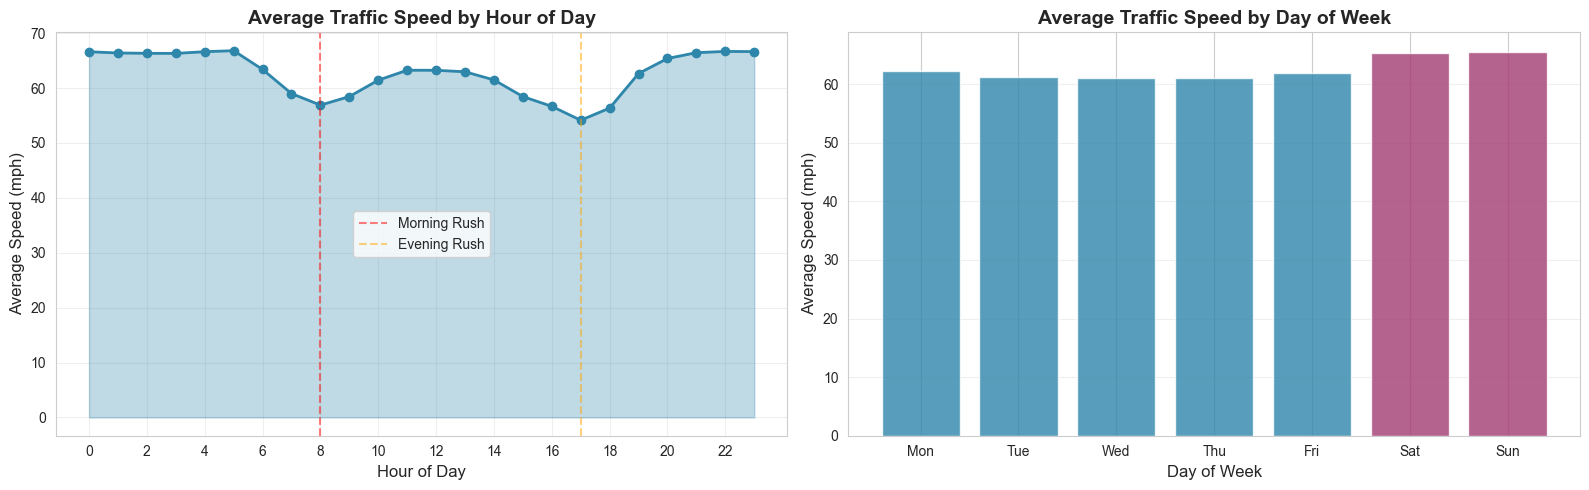


Key Findings:
  - Slowest hour (morning rush): 8:00 (56.90 mph)
  - Slowest hour (evening rush): 17:00 (54.15 mph)
  - Fastest hour: 5:00 (66.82 mph)
  - Weekend speeds are higher than weekday speeds


In [6]:
# Visualization 1: Average Traffic Speed by Hour of Day
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Hourly pattern
hourly_avg = df.groupby('hour')['avg_speed'].mean()
axes[0].plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2, color='#2E86AB')
axes[0].fill_between(hourly_avg.index, hourly_avg.values, alpha=0.3, color='#2E86AB')
axes[0].set_xlabel('Hour of Day', fontsize=12)
axes[0].set_ylabel('Average Speed (mph)', fontsize=12)
axes[0].set_title('Average Traffic Speed by Hour of Day', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(0, 24, 2))

# Add annotations for key hours
rush_hour_morning = hourly_avg.index[7:10][hourly_avg[7:10].argmin()] 
rush_hour_evening = hourly_avg.index[16:19][hourly_avg[16:19].argmin()]
axes[0].axvline(x=rush_hour_morning, color='red', linestyle='--', alpha=0.5, label='Morning Rush')
axes[0].axvline(x=rush_hour_evening, color='orange', linestyle='--', alpha=0.5, label='Evening Rush')
axes[0].legend()

# Daily pattern across the week
day_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
daily_avg = df.groupby('day_of_week')['avg_speed'].mean()
colors = ['#2E86AB']*5 + ['#A23B72', '#A23B72']  # Different colors for weekends
axes[1].bar(daily_avg.index, daily_avg.values, color=colors, alpha=0.8)
axes[1].set_xlabel('Day of Week', fontsize=12)
axes[1].set_ylabel('Average Speed (mph)', fontsize=12)
axes[1].set_title('Average Traffic Speed by Day of Week', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(day_names)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('../docs/temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nKey Findings:")
print(f"  - Slowest hour (morning rush): {rush_hour_morning}:00 ({hourly_avg[rush_hour_morning]:.2f} mph)")
print(f"  - Slowest hour (evening rush): {rush_hour_evening}:00 ({hourly_avg[rush_hour_evening]:.2f} mph)")
print(f"  - Fastest hour: {hourly_avg.idxmax()}:00 ({hourly_avg.max():.2f} mph)")
print(f"  - Weekend speeds are {'higher' if daily_avg[5:].mean() > daily_avg[:5].mean() else 'lower'} than weekday speeds")


## 4. Spatial Analysis - Adjacency Matrix

The adjacency matrix represents spatial relationships between sensors (road network connectivity). This is crucial for the DCRNN's diffusion convolution operations.


In [7]:
# Load adjacency matrix
print("Loading adjacency matrix...")
with open(ADJ_MATRIX_PATH, 'rb') as f:
    adj_data = pickle.load(f, encoding='latin1')

# The adjacency matrix might be in different formats
# Usually it's a tuple of (adj_matrix, sensor_ids, distances)
if isinstance(adj_data, list) or isinstance(adj_data, tuple):
    print(f"Adjacency data is a {type(adj_data).__name__} with {len(adj_data)} elements")
    # Try to extract the actual adjacency matrix
    for i, item in enumerate(adj_data):
        if hasattr(item, 'shape'):
            adj_matrix = item
            print(f"  Element {i}: Array/Matrix with shape {item.shape}")
        else:
            print(f"  Element {i}: {type(item).__name__}")
else:
    adj_matrix = adj_data
    print(f"Adjacency matrix shape: {adj_matrix.shape}")

print(f"\nAdjacency Matrix Statistics:")
print(f"  - Shape: {adj_matrix.shape}")
print(f"  - Total possible connections: {adj_matrix.shape[0] * adj_matrix.shape[1]:,}")
print(f"  - Non-zero connections: {np.count_nonzero(adj_matrix):,}")
print(f"  - Sparsity: {(1 - np.count_nonzero(adj_matrix)/adj_matrix.size)*100:.2f}%")
print(f"  - Mean edge weight: {adj_matrix[adj_matrix > 0].mean():.4f}")
print(f"  - Max edge weight: {adj_matrix.max():.4f}")


Loading adjacency matrix...
Adjacency data is a list with 3 elements
  Element 0: list
  Element 1: dict
  Element 2: Array/Matrix with shape (325, 325)

Adjacency Matrix Statistics:
  - Shape: (325, 325)
  - Total possible connections: 105,625
  - Non-zero connections: 2,694
  - Sparsity: 97.45%
  - Mean edge weight: 0.6142
  - Max edge weight: 1.0000


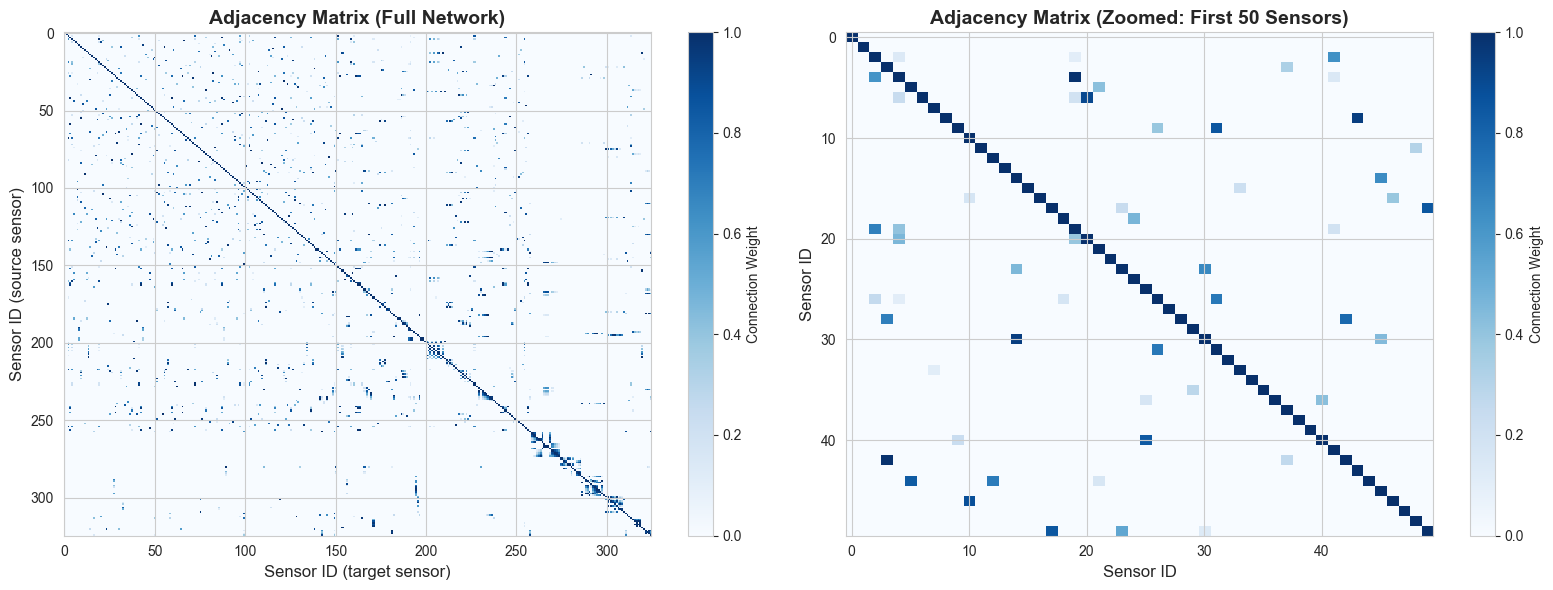


Node Degree Statistics:
  - Mean connections per sensor: 8.29
  - Max connections: 23
  - Min connections: 1
  - Median connections: 8


In [10]:
# Visualization 2: Adjacency Matrix Heatmap
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full adjacency matrix (sparse visualization)
im1 = axes[0].imshow(adj_matrix, cmap='Blues', aspect='auto', interpolation='nearest')
axes[0].set_title('Adjacency Matrix (Full Network)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sensor ID (target sensor)', fontsize=12)
axes[0].set_ylabel('Sensor ID (source sensor)', fontsize=12)
plt.colorbar(im1, ax=axes[0], label='Connection Weight')

# Zoomed view of a subset (first 50x50 sensors for visibility)
im2 = axes[1].imshow(adj_matrix[:50, :50], cmap='Blues', aspect='auto', interpolation='nearest')
axes[1].set_title('Adjacency Matrix (Zoomed: First 50 Sensors)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sensor ID', fontsize=12)
axes[1].set_ylabel('Sensor ID', fontsize=12)
plt.colorbar(im2, ax=axes[1], label='Connection Weight')

plt.tight_layout()
plt.savefig('../docs/adjacency_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate degree distribution (number of connections per sensor)
degree = (adj_matrix > 0).sum(axis=1)
print(f"\nNode Degree Statistics:")
print(f"  - Mean connections per sensor: {degree.mean():.2f}")
print(f"  - Max connections: {degree.max()}")
print(f"  - Min connections: {degree.min()}")
print(f"  - Median connections: {np.median(degree):.0f}")


## 5. Traffic Speed Distribution Analysis


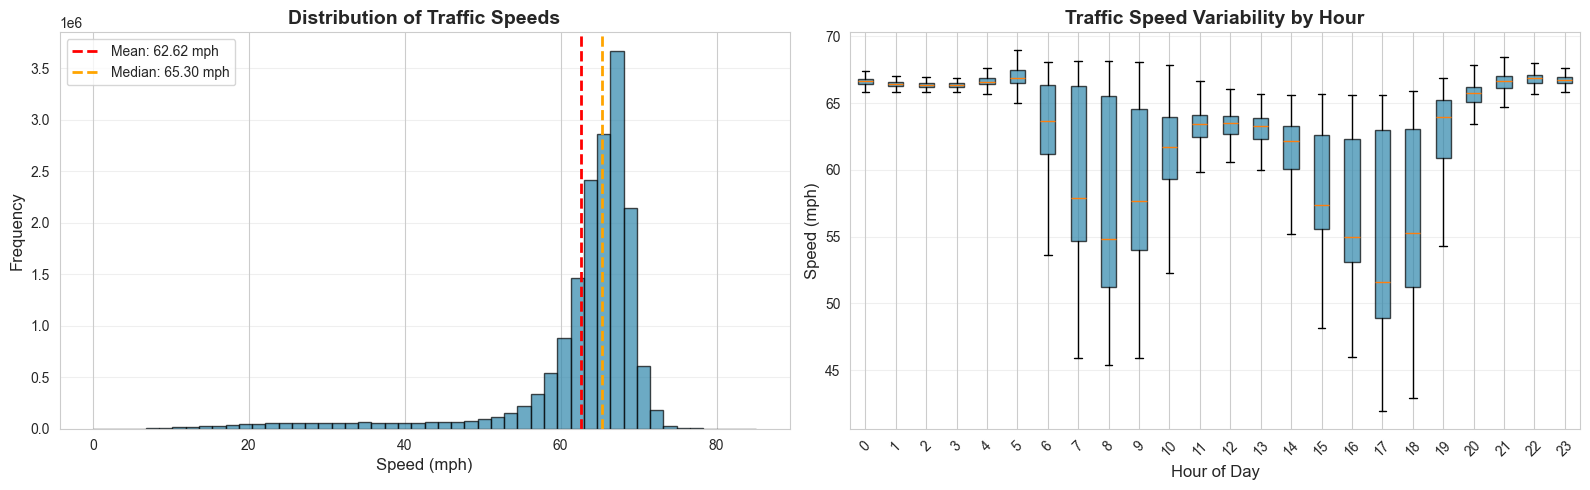

In [9]:
# Visualization 3: Speed Distribution and Box Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Histogram of all speed values
axes[0].hist(speed_data.values.flatten(), bins=50, color='#2E86AB', alpha=0.7, edgecolor='black')
axes[0].axvline(speed_data.values.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {speed_data.values.mean():.2f} mph')
axes[0].axvline(np.median(speed_data.values), color='orange', linestyle='--', linewidth=2, label=f'Median: {np.median(speed_data.values):.2f} mph')
axes[0].set_xlabel('Speed (mph)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Traffic Speeds', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Box plot showing variability by hour
hourly_data = [df[df['hour'] == h]['avg_speed'].values for h in range(24)]
bp = axes[1].boxplot(hourly_data, patch_artist=True, showfliers=False)
for patch in bp['boxes']:
    patch.set_facecolor('#2E86AB')
    patch.set_alpha(0.7)
axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].set_ylabel('Speed (mph)', fontsize=12)
axes[1].set_title('Traffic Speed Variability by Hour', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_xticklabels(range(24), rotation=45)

plt.tight_layout()
plt.savefig('../docs/speed_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## 6. Time Series Visualization for Sample Sensors

Visualizing actual time series helps understand the temporal dynamics and autocorrelation in the data.


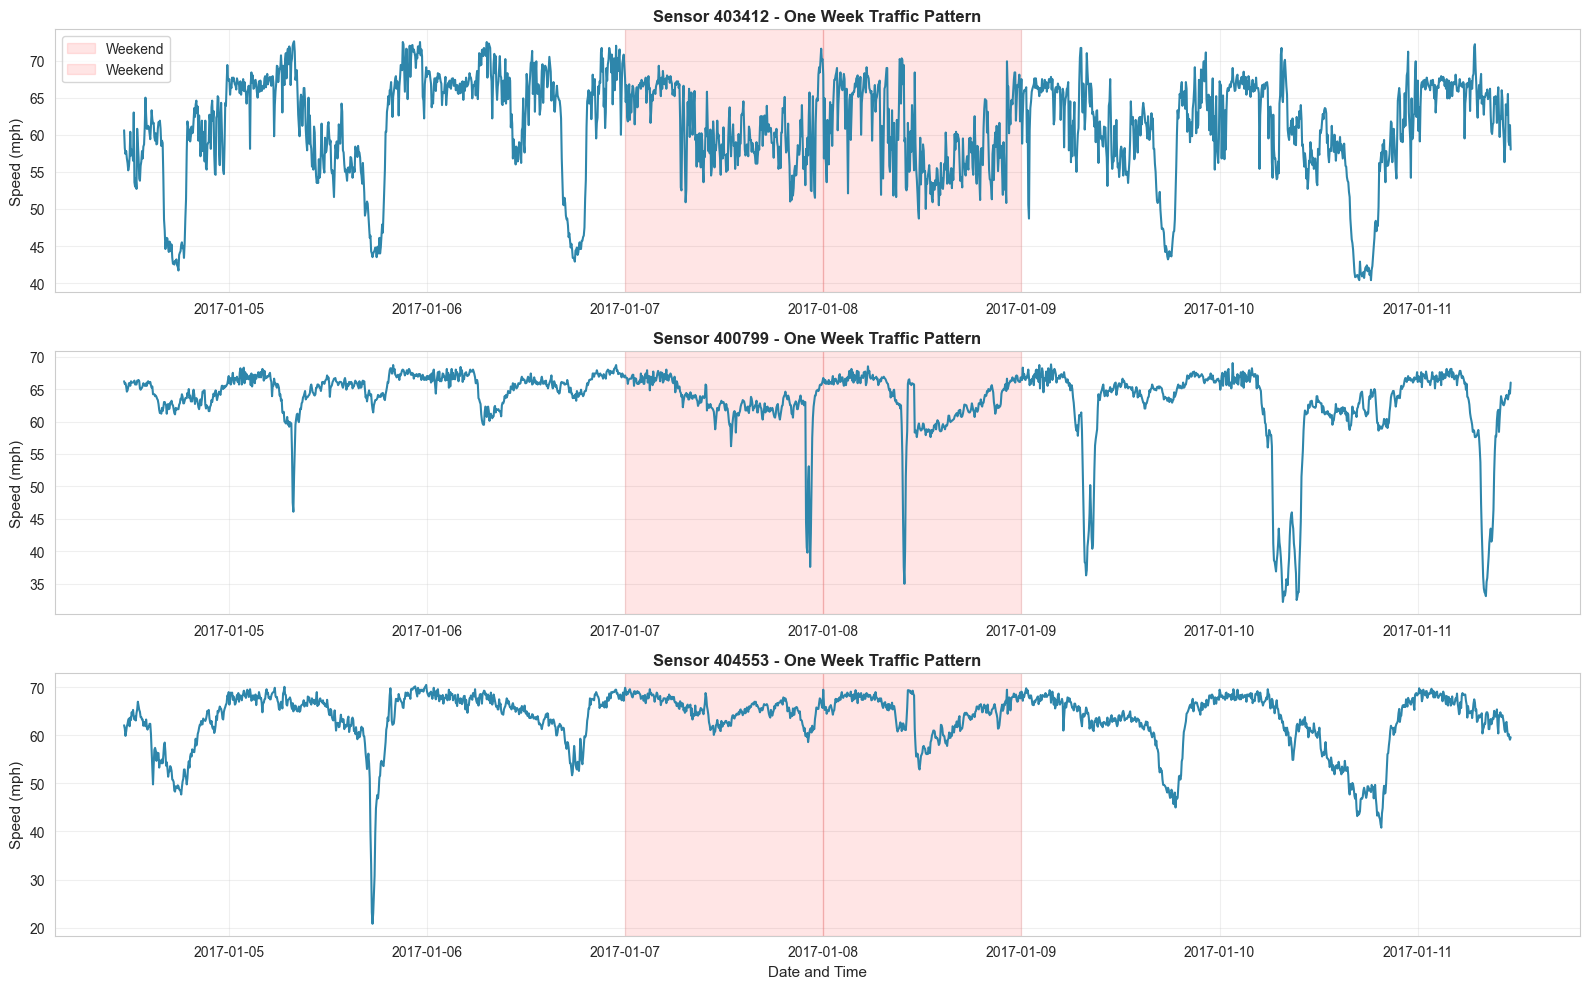


Time series showing clear daily periodicity and weekend patterns.


In [11]:
# Visualization 4: Time Series for 3 Random Sensors (One Week)
# Select one week of data for visualization clarity
week_start = 1000
week_end = week_start + 7 * 288  # 7 days * 288 timesteps per day

# Select 3 random sensors
np.random.seed(42)
sample_sensors = np.random.choice(speed_data.columns, 3, replace=False)

fig, axes = plt.subplots(3, 1, figsize=(16, 10))

for idx, sensor in enumerate(sample_sensors):
    sensor_data = df.iloc[week_start:week_end]
    axes[idx].plot(sensor_data['timestamp'], sensor_data[sensor], linewidth=1.5, color='#2E86AB')
    axes[idx].set_ylabel('Speed (mph)', fontsize=11)
    axes[idx].set_title(f'Sensor {sensor} - One Week Traffic Pattern', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    
    # Highlight weekends
    for date in sensor_data['date'].unique():
        if pd.to_datetime(date).dayofweek >= 5:  # Saturday or Sunday
            day_data = sensor_data[sensor_data['date'] == date]
            if len(day_data) > 0:
                axes[idx].axvspan(day_data['timestamp'].iloc[0], day_data['timestamp'].iloc[-1], 
                                 alpha=0.1, color='red', label='Weekend' if idx == 0 else '')
    
    if idx == 0:
        axes[idx].legend()

axes[2].set_xlabel('Date and Time', fontsize=11)
plt.tight_layout()
plt.savefig('../docs/time_series_sample.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTime series showing clear daily periodicity and weekend patterns.")


## 7. Spatial Correlation Analysis

Analyzing how traffic speeds correlate between nearby sensors validates the need for spatial modeling (diffusion convolution).


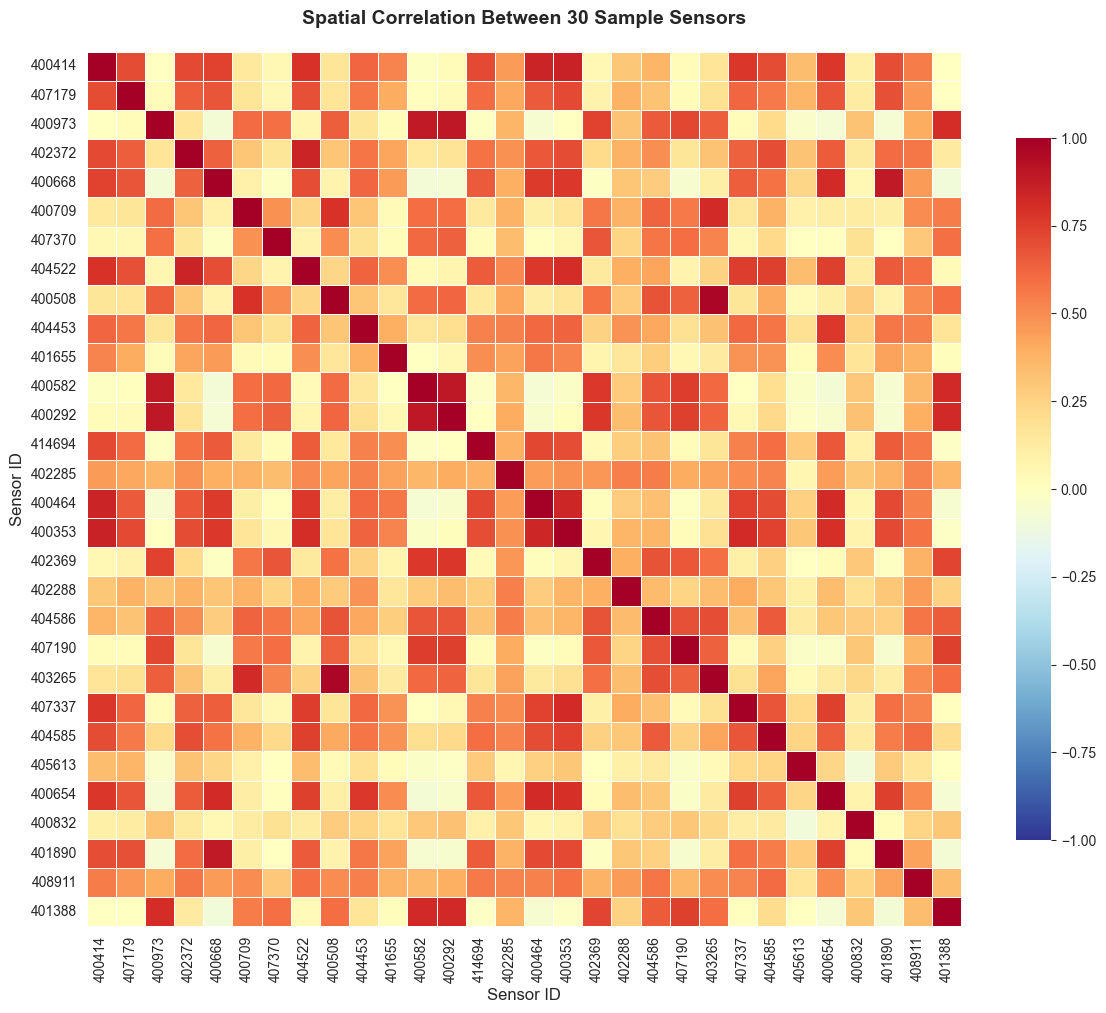


Correlation Statistics:
  - Mean correlation: 0.359
  - Max correlation (non-diagonal): 0.970
  - Min correlation: -0.092

  High positive correlations indicate strong spatial dependencies,
  validating the need for graph-based spatial modeling in DCRNN.


In [12]:
# Select a subset of sensors for correlation analysis (too many sensors would be unreadable)
num_sensors_to_plot = 30
sample_sensor_indices = np.random.choice(range(len(speed_data.columns)), num_sensors_to_plot, replace=False)
sample_sensor_cols = speed_data.columns[sample_sensor_indices]

# Compute correlation matrix for the subset
correlation_matrix = speed_data[sample_sensor_cols].corr()

# Visualization 5: Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title(f'Spatial Correlation Between {num_sensors_to_plot} Sample Sensors', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Sensor ID', fontsize=12)
plt.ylabel('Sensor ID', fontsize=12)
plt.tight_layout()
plt.savefig('../docs/spatial_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nCorrelation Statistics:")
print(f"  - Mean correlation: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].mean():.3f}")
print(f"  - Max correlation (non-diagonal): {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].max():.3f}")
print(f"  - Min correlation: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].min():.3f}")
print(f"\n  High positive correlations indicate strong spatial dependencies,")
print(f"  validating the need for graph-based spatial modeling in DCRNN.")


## 8. Key Findings Summary

### Data Characteristics:
- **Large-scale dataset:** 52,116 timesteps across 325 sensors
- **High quality:** No missing values, complete coverage
- **Strong temporal patterns:** Clear rush hour effects, weekday/weekend differences
- **Spatial dependencies:** High correlation between nearby sensors

### Implications for DCRNN Modeling:

1. **Temporal Dynamics (GRU Component):**
   - Strong daily and weekly periodicity requires recurrent modeling
   - 5-minute sampling captures short-term dynamics
   - Input sequence length of 12 steps (1 hour) is appropriate

2. **Spatial Dependencies (Diffusion Convolution):**
   - High spatial correlation validates graph-based approach
   - Adjacency matrix is sparse (efficient computation)
   - Multiple diffusion hops can capture neighborhood effects

3. **Data Preprocessing Requirements:**
   - Z-score normalization to handle speed variations
   - Sequence creation with sliding window (T_in=12, T_out=12)
   - Chronological train/validation/test split (60/20/20)

### Next Steps:
- Implement DCRNN architecture with encoder-decoder structure
- Train on historical data (first 4 months)
- Validate on held-out data (1 month)
- Test on final month and evaluate MAE, RMSE, MAPE metrics
